<a href="https://colab.research.google.com/github/shelfertmurphy/Classification/blob/main/ClassificationModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file contains a simple example of cleaning and prepping data using scikit learn for classification. We try out Linear SVC, Logistic Regression, and Decision Tree Classification using scikit learn on the data. The models use various health metrics to predict if a given patient has diabetes. 


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#load in data
data = pd.read_csv('diabetes.csv')

#display the head of the data set
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#show the size of the data set, 768 samples with 9 attributes
data.shape

(768, 9)

In [4]:
#check if any columns have null values, if false, our data is clean
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
#display basic descriptive statistics of the dataset
data.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#select x columns using pandas drop to drop the outcome column
x_values = data.drop('Outcome', axis = 1)
x_values.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
#select y columns
y_values = data['Outcome']
y_values.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
#now, scale data, mean should be zero and data is in terms of zscore

scaler = StandardScaler()
x_values = x_values.astype('float64')
x_scaled = scaler.fit_transform(x_values)
x_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [9]:
#split data into train and test


x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_values, test_size = 0.33)

#check size of train and test
print('Training features shape: ', x_train.shape)
print('Training outcome shape: ', y_train.shape)
print('Testing features shape: ', x_test.shape)
print('Testing features shape: ', y_test.shape)

Training features shape:  (514, 8)
Training outcome shape:  (514,)
Testing features shape:  (254, 8)
Testing features shape:  (254,)


In [10]:
#implement model


#train model
model = LinearSVC(max_iter = 10000)
model.fit(x_train, y_train)


LinearSVC(max_iter=10000)

In [11]:
#test model
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [12]:
#compare predictions to actual y_test
#because this has binary operations, we expect we can randomly guess with 50% accuracy, so we want our model to preform significantly better than that
#we get a score of 81, which is pretty good

accuracy_score(y_test, y_pred)

0.7480314960629921

Now, we implement a logistic regression model for the same dataset.

In [13]:
##Logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

#train model
logreg.fit(x_train, y_train)

LogisticRegression()

In [25]:
#test model 
y_logpred = logreg.predict(x_test)
y_logpred

accuracy_score(y_test, y_logpred)

0.7480314960629921

Both models return the same accuracy score! Now we try a decision tree.

In [26]:
##Decision Tree
from sklearn import tree

tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_treepred = tree.predict(x_test)

accuracy_score(y_test, y_treepred)


0.6811023622047244

It looks like the decision tree preforms slightly worse. Now we create a confusion matrix for each model and construct a corresponding heatmap to visualize the accuracy of the results.


Text(0.5, 15.0, 'Predicted label')

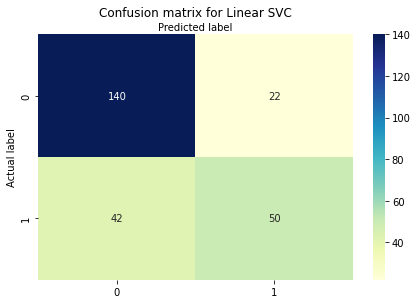

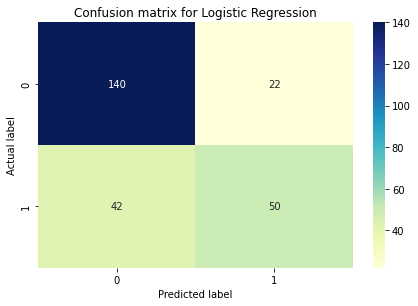

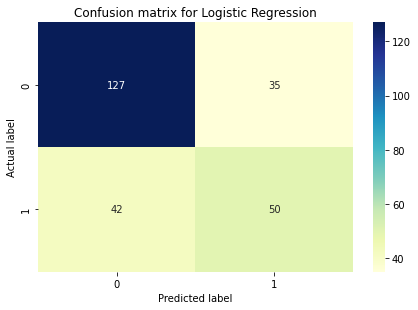

In [24]:
##model evaluation/visualization
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#create confusion matrices for each model
SVC_matrix = metrics.confusion_matrix(y_test, y_pred)
Log_matrix = metrics.confusion_matrix(y_test, y_logpred)
Tree_matrix = metrics.confusion_matrix(y_test, y_treepred)

#confusion matrix heatmaps
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(SVC_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Linear SVC', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


class_names2 = [0,1]
fig2, ax2 = plt.subplots()
tick_marks2 = np.arange(len(class_names2))
plt.xticks(tick_marks2, class_names2)
plt.yticks(tick_marks2, class_names2)

sns.heatmap(Log_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

class_names3 = [0,1]
fig3, ax3 = plt.subplots()
tick_marks3 = np.arange(len(class_names3))
plt.xticks(tick_marks3, class_names3)
plt.yticks(tick_marks3, class_names3)

sns.heatmap(Tree_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

